In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/swap9047/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/swap9047/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [4]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [5]:
def preprocess(sent):
    sent=nltk.word_tokenize(sent)
    sent=nltk.pos_tag(sent)
    return sent

In [6]:
sent=preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [7]:
pattern='NP:{<DT>?<JJ>*<NN>}'
cp=nltk.RegexpParser(pattern)
cs=cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [8]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


IOB tagging
nltk.Tree is great for processing such information in Python, but it’s not the standard way of annotating chunks. Maybe this can be an article on its own but we’ll cover this here really quickly.

The IOB Tagging system contains tags of the form:

B-{CHUNK_TYPE} – for the word in the Beginning chunk
I-{CHUNK_TYPE} – for words Inside the chunk
O – Outside any chunk
A sometimes used variation of IOB tagging is to simply merge the B and I tags:

{CHUNK_TYPE} – for words inside the chunk
O – Outside any chunk

In [11]:
# the function nltk.ne_chunk(), we can recognize named entities using a classifier,
#the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

ne_tree=nltk.ne_chunk(pos_tag(word_tokenize(ex)))
pprint(tree2conlltags(ne_tree))

[('European', 'JJ', 'B-GPE'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'B-PERSON'),
 ('a', 'DT', 'O'),
 ('record', 'NN', 'O'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('mobile', 'JJ', 'O'),
 ('phone', 'NN', 'O'),
 ('market', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'O'),
 ('company', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [10]:
nltk.download('words')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to /home/swap9047/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/swap9047/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:

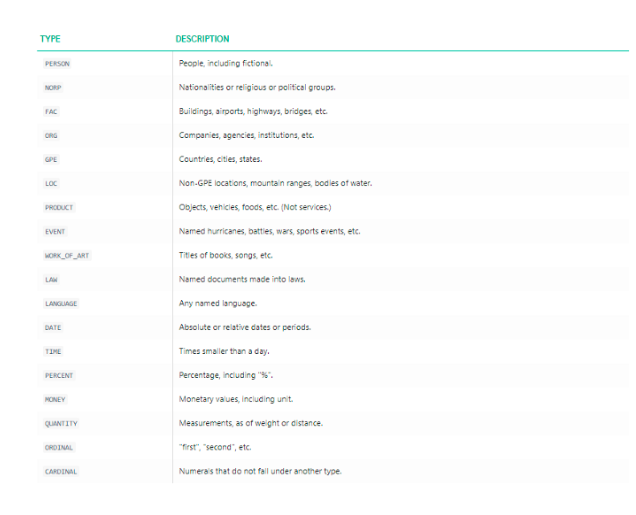

In [15]:
#ENTITY

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp=en_core_web_sm.load()

In [16]:
doc=nlp(ex)

In [17]:
pprint([(X.text,X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


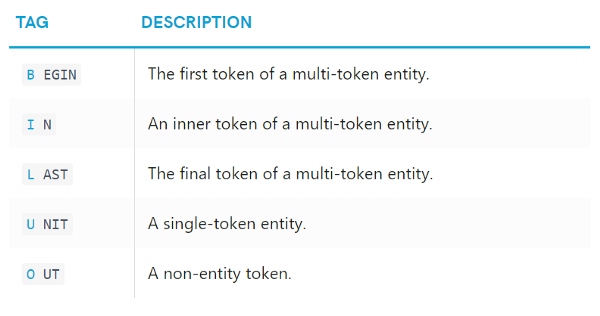

In [19]:
pprint([(X,X.ent_iob,X.ent_type_) for X in doc])

[(European, 3, 'NORP'),
 (authorities, 2, ''),
 (fined, 2, ''),
 (Google, 3, 'ORG'),
 (a, 2, ''),
 (record, 2, ''),
 ($, 3, 'MONEY'),
 (5.1, 1, 'MONEY'),
 (billion, 1, 'MONEY'),
 (on, 2, ''),
 (Wednesday, 3, 'DATE'),
 (for, 2, ''),
 (abusing, 2, ''),
 (its, 2, ''),
 (power, 2, ''),
 (in, 2, ''),
 (the, 2, ''),
 (mobile, 2, ''),
 (phone, 2, ''),
 (market, 2, ''),
 (and, 2, ''),
 (ordered, 2, ''),
 (the, 2, ''),
 (company, 2, ''),
 (to, 2, ''),
 (alter, 2, ''),
 (its, 2, ''),
 (practices, 2, '')]


In [21]:
from bs4 import BeautifulSoup
import requests
import re

url='https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news'

In [24]:
res=requests.get(url)
html=res.text


In [27]:
soup=BeautifulSoup(html)

/home/swap9047/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/swap9047/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [37]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

188

In [54]:
dictl=Counter(labels)
{k:v for k,v in dictl.items()}

In [59]:
items=[x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 32), ('F.B.I.', 17), ('Trump', 10)]

In [60]:
sentences = [x for x in article.sents]
print(sentences[20])

Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president’s ire.


In [61]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

### Next, we verbatim, extract part-of-speech and lemmatize this sentence.

In [72]:
[(x.orth_,x.pos_,x.lemma_) for x in sentences[20] if not x.is_stop and x.pos_!='PUNCT']

[('Firing', 'VERB', 'fire'),
 ('Mr.', 'PROPN', 'mr.'),
 ('Strzok', 'PROPN', 'strzok'),
 ('removes', 'VERB', 'remove'),
 ('favorite', 'ADJ', 'favorite'),
 ('target', 'NOUN', 'target'),
 ('Mr.', 'PROPN', 'mr.'),
 ('Trump', 'PROPN', 'trump'),
 ('ranks', 'NOUN', 'rank'),
 ('F.B.I.', 'PROPN', 'f.b.i.'),
 ('gives', 'VERB', 'give'),
 ('Mr.', 'PROPN', 'mr.'),
 ('Bowdich', 'PROPN', 'bowdich'),
 ('F.B.I.', 'PROPN', 'f.b.i.'),
 ('director', 'NOUN', 'director'),
 ('Christopher', 'PROPN', 'christopher'),
 ('A.', 'PROPN', 'a.'),
 ('Wray', 'PROPN', 'wray'),
 ('chance', 'NOUN', 'chance'),
 ('president', 'NOUN', 'president'),
 ('’s', 'PART', '’s'),
 ('ire', 'NOUN', 'ire')]

In [77]:
nlp(str(sentences[20])).ents

(Strzok, Trump, F.B.I., Bowdich, F.B.I., Christopher A. Wray)

In [86]:
{x:x.label_ for x in nlp(str(sentences[20])).ents}

{Strzok: 'PERSON',
 Trump: 'PERSON',
 F.B.I.: 'GPE',
 Bowdich: 'PERSON',
 F.B.I.: 'GPE',
 Christopher A. Wray: 'PERSON'}

In [94]:
[(x.orth_,x.ent_iob_,x.ent_type_) for x in sentences[20]]

[('Firing', 'O', ''),
 ('Mr.', 'O', ''),
 ('Strzok', 'B', 'PERSON'),
 (',', 'O', ''),
 ('however', 'O', ''),
 (',', 'O', ''),
 ('removes', 'O', ''),
 ('a', 'O', ''),
 ('favorite', 'O', ''),
 ('target', 'O', ''),
 ('of', 'O', ''),
 ('Mr.', 'O', ''),
 ('Trump', 'B', 'PERSON'),
 ('from', 'O', ''),
 ('the', 'O', ''),
 ('ranks', 'O', ''),
 ('of', 'O', ''),
 ('the', 'O', ''),
 ('F.B.I.', 'B', 'GPE'),
 ('and', 'O', ''),
 ('gives', 'O', ''),
 ('Mr.', 'O', ''),
 ('Bowdich', 'B', 'PERSON'),
 ('and', 'O', ''),
 ('the', 'O', ''),
 ('F.B.I.', 'B', 'GPE'),
 ('director', 'O', ''),
 (',', 'O', ''),
 ('Christopher', 'B', 'PERSON'),
 ('A.', 'I', 'PERSON'),
 ('Wray', 'I', 'PERSON'),
 (',', 'O', ''),
 ('a', 'O', ''),
 ('chance', 'O', ''),
 ('to', 'O', ''),
 ('move', 'O', ''),
 ('beyond', 'O', ''),
 ('the', 'O', ''),
 ('president', 'O', ''),
 ('’s', 'O', ''),
 ('ire', 'O', ''),
 ('.', 'O', '')]

In [96]:
displacy.render(article, jupyter=True, style='ent')